<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/AULA_33_AGRUPAMENTO_HIERARQUICO_PRATICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

#### Material de Apoio - Prática sobre Agrupamento Hierárquico de Dados (ver Vídeo)

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

# Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
import seaborn as sns

# Testando agrupamento hierárquico
Inicialmente, vamos carregar um conjunto de dados (sintético) para testar a execução de três algoritmos de agrupamento hierárquico: single-link, complete-link, average-link

# Exemplo #1

In [ ]:
dados1 = pd.read_csv('hc_exemplo1.csv')
dados1.head(10)

,x,y
0,1.82,11.60
1,1.82,8.65
2,5.22,8.15
3,3.62,10.75
4,2.72,7.80
5,4.27,6.75
6,3.82,8.50
7,2.22,10.10
8,3.17,12.30
9,4.52,10.05


Vamos visualizar o nosso conjunto de dados

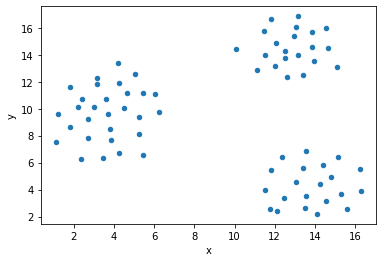

In [ ]:
dados1.plot(kind='scatter',x='x',y='y')

Agora, vamos calcular uma matriz de dissimilaridades usando a distância euclidiana.

Você pode utilizar a biblioteca pdist para calcular a matriz de distância [https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html]

In [ ]:
def calcular_matriz_dissimilaridade(dados):
  M = np.zeros((len(dados),len(dados)))
  for i,row_i in dados.iterrows(): # para cada objeto i
      features_i = np.array(row_i) # atributos do objeto i
      for j,row_j in dados.iterrows(): # para cada objeto j
          features_j = np.array(row_j) # atributos do objeto j
          # calcula distância euclidiana
          euc = scipy.spatial.distance.euclidean(features_i, features_j)
          # armazena na posição M[i,j]
          M[i,j] = euc
  return M

In [ ]:
M = calcular_matriz_dissimilaridade(dados1)

In [ ]:
# apenas para discutir
pd.DataFrame(M)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70
0,0.000000,2.950000,4.843810,1.990603,3.905125,5.433691,3.689173,1.552417,1.520691,3.113278,4.229657,3.352611,4.773102,2.758623,5.328461,6.201814,5.503181,4.405962,4.077070,2.563201,4.110049,2.088061,1.364734,2.885308,2.970269,3.628016,2.468299,1.040433,1.882153,10.504523,9.992497,8.712204,9.383629,11.035398,10.752907,10.826010,11.590729,10.913867,12.098140,11.202790,11.763715,13.471637,12.505399,12.405845,12.305487,10.317097,11.634861,13.384319,13.173173,12.712396,13.441075,15.480633,16.502803,16.373530,15.619299,14.308913,12.673792,11.739889,11.739783,12.322743,13.416501,13.777246,14.730665,14.243068,13.250000,13.059862,13.870833,14.602140,14.382020,15.295914,15.666924
1,2.950000,0.000000,3.436568,2.765863,1.237942,3.100403,2.005617,1.504161,3.891658,3.041381,4.862355,5.083552,4.535416,2.124265,2.413504,4.167733,2.830636,2.259425,3.471311,1.054751,1.303840,1.123610,3.427098,3.791108,5.277310,4.382921,4.070012,2.184033,1.920937,11.980505,11.077567,10.056093,10.204411,12.100103,11.979253,11.416217,12.526472,11.853270,13.465604,12.806248,13.008171,14.691920,14.002232,13.416874,13.100859,11.148543,12.222213,14.024710,14.118959,13.935656,11.873710,13.888574,15.088075,15.210687,14.729902,13.530059,11.887073,10.776943,10.499524,10.756974,11.644956,12.022063,13.148764,12.809079,11.956797,11.994269,12.918301,13.516286,13.155417,13.885694,14.396180
2,4.843810,3.436568,0.000000,3.052868,2.524381,1.691892,1.443087,3.578058,4.628715,2.024846,3.056550,4.454492,1.886796,2.086265,3.397793,1.612452,2.510478,1.423025,1.200000,2.711549,4.143670,4.254703,4.186287,3.050000,5.295281,3.006659,3.868462,3.820995,2.973214,9.839842,8.597238,7.911068,7.543209,9.545287,9.581884,8.508819,9.840859,9.200543,11.136988,10.761505,10.578398,12.176309,11.785266,10.760228,10.282145,8.440379,9.282376,11.068536,11.385298,11.448690,8.667468,10.705723,11.811858,11.839130,11.303097,10.094181,8.450592,7.349320,7.130919,7.544037,8.585162,8.949860,9.956907,9.533231,8.615393,8.587345,9.495394,10.119289,9.796173,10.602948,11.057124
3,1.990603,2.765863,3.052868,0.000000,3.084234,4.052468,2.258871,1.543535,1.614001,1.140175,2.425387,2.320022,2.785678,1.154340,4.622229,4.569464,4.402556,3.060229,2.126029,1.792345,4.060788,2.661297,1.142366,1.123610,2.668333,1.843909,1.320984,1.200000,0.848528,9.307121,8.542394,7.411140,7.788453,9.581884,9.392151,9.141116,10.071867,9.392018,10.834782,10.101980,10.420293,12.121984,11.331924,10.931720,10.722057,8.736132,9.955024,11.737653,11.668976,11.361008,11.504130,13.540772,14.534098,14.385583,13.630847,12.324468,10.687025,9.749487,9.763708,10.390982,11.525841,11.880236,12.791403,12.281795,11.274972,11.070795,11.880341,12.612692,12.399395,13.329010,13.685759
4,3.905125,1.237942,2.524381,3.084234,0.000000,1.872165,1.303840,2.353720,4.522444,2.881406,4.666905,5.322593,4.006557,2.059126,1.540292,2.975315,1.632483,1.154340,2.941513,1.400000,1.619413,2.343075,4.025233,3.876209,5.749130,4.302615,4.383207,2.965215,2.369072,11.822225,10.764757,9.878385,9.801148,11.759677,11.710038,10.895527,12.125387,11.464838,13.235747,12.693798,12.730475,14.382107,13.824073,13.033994,12.634279,10.729049,11.686745,13.485177,13.700091,13.636165,10.696845,12.701181,13.927401,14.100089,13.686216,12.522979,10.891510,9.743972,9.398537,9.585406,10.437552,10.815845,11.965053,11.652682,10.833397,10.923827,11.869709,12.431110,12.040037,12.729690,13.265840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,13.870833,12.918301,9.495394,11.880341,11.869709,10.194361,10.938464,12.935610,12.992786,10.773695,9.932271,11.601724,9.101786,11.3547

## Agrupamento com Single-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


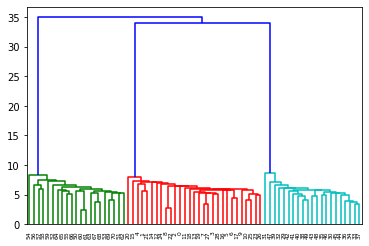

In [ ]:
Z = hierarchy.linkage(M, 'single')
dendrogram = hierarchy.dendrogram(Z)

In [ ]:
dados1['cluster'] = hierarchy.cut_tree(Z,n_clusters=3)
dados1.sample(10)

,x,y,cluster
7,2.22,10.10,0
24,4.22,13.35,0
1,1.82,8.65,0
8,3.17,12.30,0
65,13.42,5.60,2
6,3.82,8.50,0
42,13.17,16.85,1
41,14.57,15.95,1
51,14.12,2.20,2
20,1.12,7.55,0


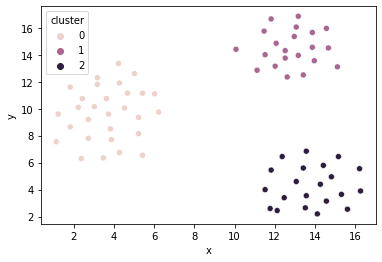

In [ ]:
sns.scatterplot(data=dados1, x="x", y="y", hue="cluster")

## Agrupamento com Complete-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


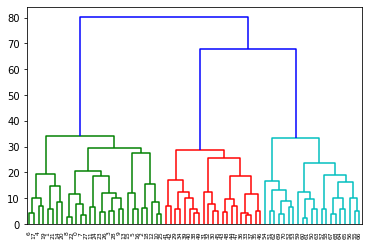

In [ ]:
Z = hierarchy.linkage(M, 'complete')
dendrogram = hierarchy.dendrogram(Z)

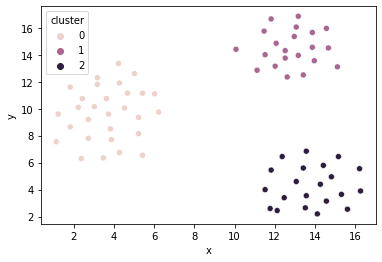

In [ ]:
dados1['cluster'] = hierarchy.cut_tree(Z,n_clusters=3)
sns.scatterplot(data=dados1, x="x", y="y", hue="cluster")

## Agrupamento com Average-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


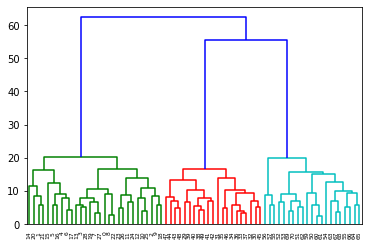

In [ ]:
Z = hierarchy.linkage(M, 'average')
dendrogram = hierarchy.dendrogram(Z)

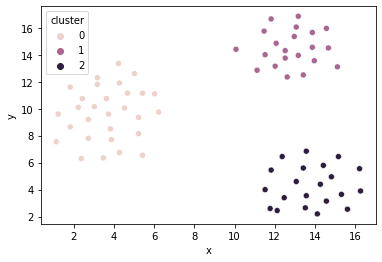

In [ ]:
dados1['cluster'] = hierarchy.cut_tree(Z,n_clusters=3)
sns.scatterplot(data=dados1, x="x", y="y", hue="cluster")

# Exemplo 2

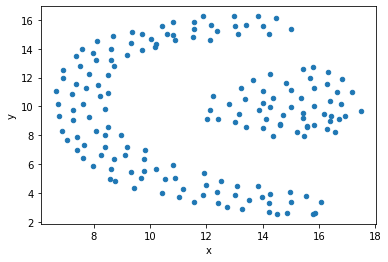

In [ ]:
dados2 = pd.read_csv('hc_exemplo2.csv')
dados2.plot(kind='scatter',x='x',y='y')

In [ ]:
M = calcular_matriz_dissimilaridade(dados2)

## Agrupamento com Single-Link



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


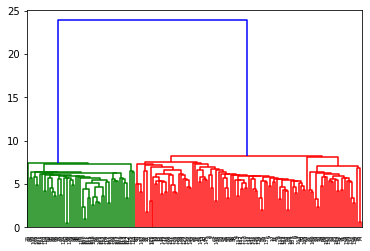

In [ ]:
Z = hierarchy.linkage(M, 'single')
dendrogram = hierarchy.dendrogram(Z)

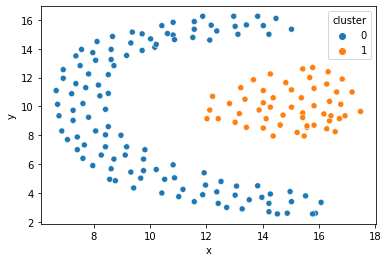

In [ ]:
dados2['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados2, x="x", y="y", hue="cluster")

## Agrupamento com Complete-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


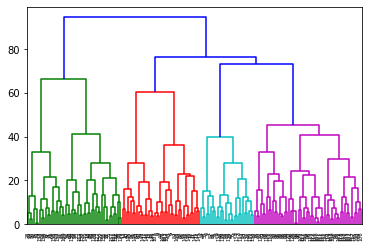

In [ ]:
Z = hierarchy.linkage(M, 'complete')
dendrogram = hierarchy.dendrogram(Z)

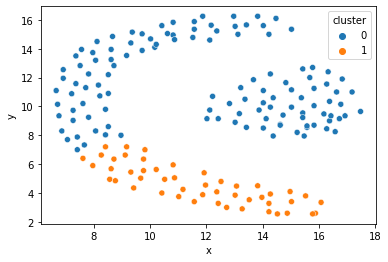

In [ ]:
dados2['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados2, x="x", y="y", hue="cluster")

## Agrupamento com Average-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


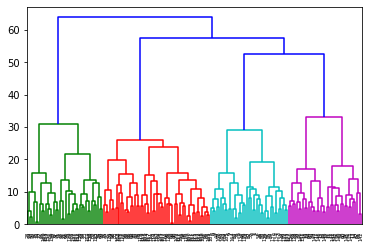

In [ ]:
Z = hierarchy.linkage(M, 'average')
dendrogram = hierarchy.dendrogram(Z)

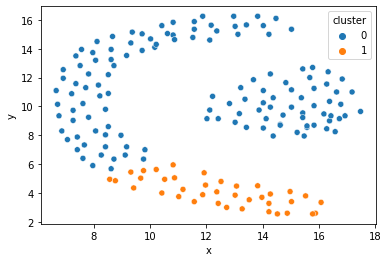

In [ ]:
dados2['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados2, x="x", y="y", hue="cluster")

# Exemplo 3

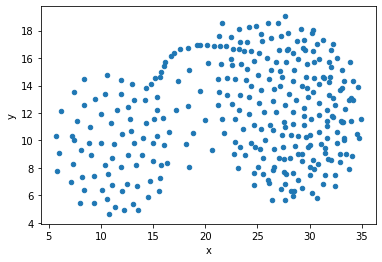

In [ ]:
dados3 = pd.read_csv('hc_exemplo3.csv')
dados3.plot(kind='scatter',x='x',y='y')

In [ ]:
M = calcular_matriz_dissimilaridade(dados3)

## Agrupamento com Single-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


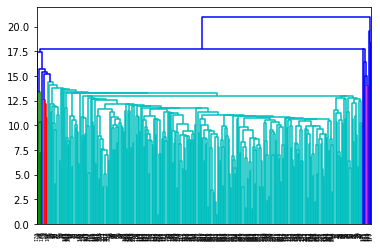

In [ ]:
Z = hierarchy.linkage(M, 'single')
dendrogram = hierarchy.dendrogram(Z)

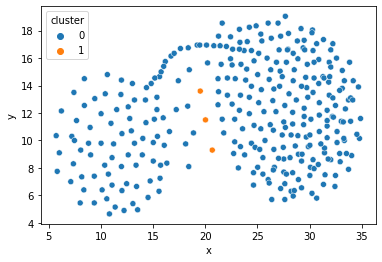

In [ ]:
dados3['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados3, x="x", y="y", hue="cluster")

## Agrupamento com Complete-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


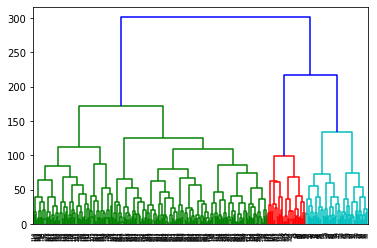

In [ ]:
Z = hierarchy.linkage(M, 'complete')
dendrogram = hierarchy.dendrogram(Z)

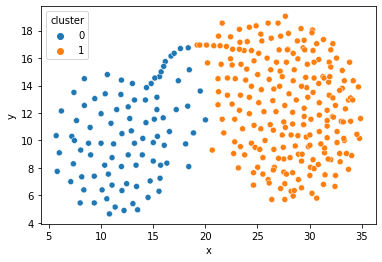

In [ ]:
dados3['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados3, x="x", y="y", hue="cluster")

# Agrupamento com Average-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


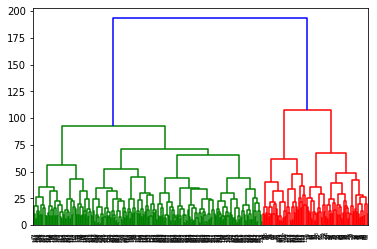

In [ ]:
Z = hierarchy.linkage(M, 'average')
dendrogram = hierarchy.dendrogram(Z)

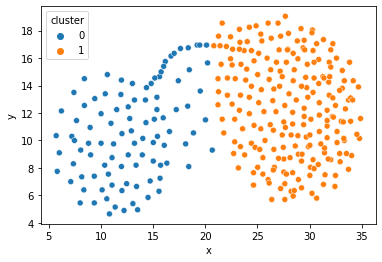

In [ ]:
dados3['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados3, x="x", y="y", hue="cluster")

# Exemplo #4

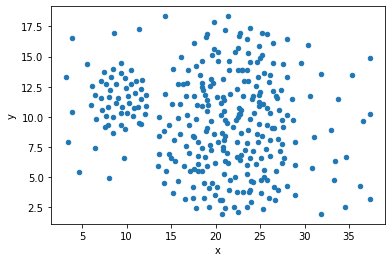

In [ ]:
dados4 = pd.read_csv('hc_exemplo4.csv')
dados4.plot(kind='scatter',x='x',y='y')

In [ ]:
M = calcular_matriz_dissimilaridade(dados4)

## Agrupamento com Single-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


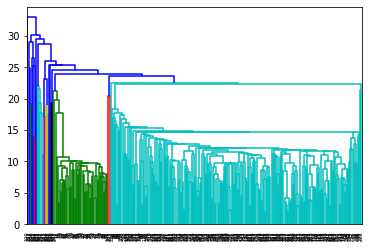

In [ ]:
Z = hierarchy.linkage(M, 'single')
dendrogram = hierarchy.dendrogram(Z)

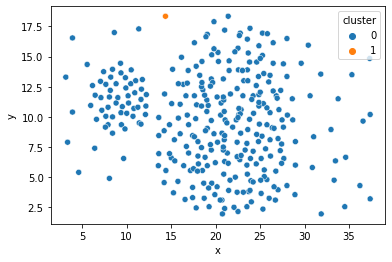

In [ ]:
dados4['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados4, x="x", y="y", hue="cluster")

## Agrupamento com Complete-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


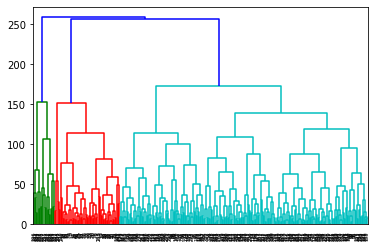

In [ ]:
Z = hierarchy.linkage(M, 'complete')
dendrogram = hierarchy.dendrogram(Z)

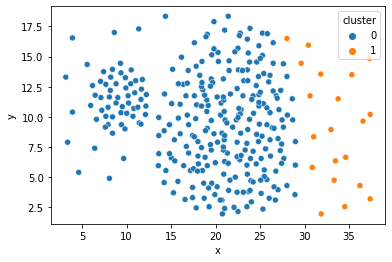

In [ ]:
dados4['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados4, x="x", y="y", hue="cluster")

## Agrupamento com Average-Link

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


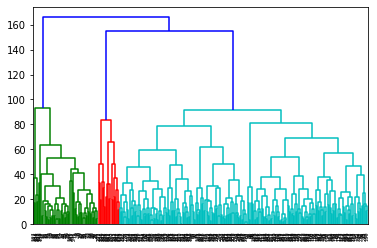

In [ ]:
Z = hierarchy.linkage(M, 'average')
dendrogram = hierarchy.dendrogram(Z)

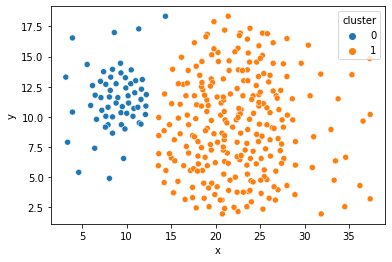

In [ ]:
dados4['cluster'] = hierarchy.cut_tree(Z,n_clusters=2)
sns.scatterplot(data=dados4, x="x", y="y", hue="cluster")

# Exemplo #5 (base Exasens)


O conjunto de dados Exasens inclui informações sobre 4 grupos de amostras de saliva coletadas Pesquisa Borstel (Alemanha). Um biossensor de permissividade foi usado para a caracterização das amostras de saliva.

Definição de 4 grupos de amostra incluídos no conjunto de dados Exasens:

(I) Pacientes ambulatoriais e pacientes hospitalizados com DPOC sem infecção respiratória aguda (DPOC).

(II) Pacientes ambulatoriais e hospitalizados com asma sem infecções respiratórias agudas (Asma).

(III) Pacientes com infecções respiratórias, mas sem DPOC ou asma (infectados).

(IV) controles saudáveis ​​sem DPOC, asma ou qualquer infecção respiratória (HC).


P. S. Zarrin, N. Roeckendorf, and C. Wenger. In-vitro Classification of Saliva Samples of COPD Patients and Healthy Controls Using Non-perceptron Machine Learning Tools. Annals of biomedical engineering, 2020.

In [ ]:
dados5 = pd.read_csv('hc_exemplo5_exasens.csv')
dados5.sample(30)

,Diagnosis,Gender,Age,Smoking,Saliva Permittivity
58,HC,0.0,23.0,1.0,0.693134
36,COPD,1.0,66.0,2.0,0.729077
96,Infected,1.0,36.0,1.0,0.741379
56,HC,0.0,27.0,1.0,0.724960
80,Asthma,1.0,57.0,1.0,0.737278
74,HC,1.0,20.0,1.0,0.782435
73,HC,1.0,18.0,1.0,0.745496
34,COPD,1.0,71.0,2.0,0.741379
62,HC,1.0,27.0,1.0,0.737278
41,HC,1.0,41.0,1.0,0.815273


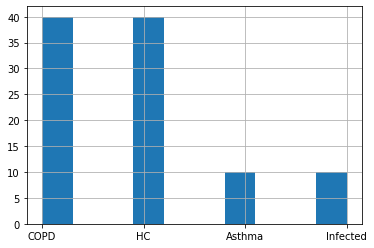

In [ ]:
dados5.Diagnosis.hist()

In [ ]:
df = dados5[['Gender','Age','Smoking','Saliva Permittivity']]
M = calcular_matriz_dissimilaridade(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


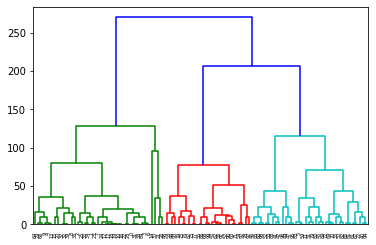

In [ ]:
Z = hierarchy.linkage(M, 'average')
dendrogram = hierarchy.dendrogram(Z)

In [ ]:
dados5['cluster'] = hierarchy.cut_tree(Z,n_clusters=4)

In [ ]:
dados5[dados5.cluster==0]

,Diagnosis,Gender,Age,Smoking,Saliva Permittivity,cluster
0,COPD,1.0,77.0,2.0,0.774217,0
1,COPD,0.0,72.0,2.0,0.737278,0
2,COPD,1.0,73.0,3.0,0.741379,0
3,COPD,1.0,76.0,2.0,0.737278,0
4,COPD,0.0,65.0,2.0,0.745496,0
6,COPD,1.0,76.0,2.0,0.737278,0
7,COPD,1.0,74.0,2.0,0.741379,0
8,COPD,1.0,67.0,2.0,0.737278,0
9,COPD,1.0,65.0,2.0,0.733178,0
10,COPD,1.0,75.0,2.0,0.733178,0


# Informações complementares

Para quem quiser se aprofundar no assunto, ler sobre outros métodos de "linkage" para agrupamento hierárquico.

*   Centroid-Link
*   Ward-Link


https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage